In [3]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

In [73]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):

  # Constructor
  def __init__(self, train = True):
    self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
    self.f = -3 * self.x +1
    self.y = self.f +0.1*torch.randn(self.x.size())

    # outliers
    if train == True:
      self.y[0] = 0
      self.y[50:55] = 20
    else: 
      pass

  # Getter
  def __getitem__(self, index):
    return self.x[index], self.y[index]

  # Get length
  def __len__(self):
    return len(self.x)

In [74]:
train_data = Data()
val_data = Data(train = False)

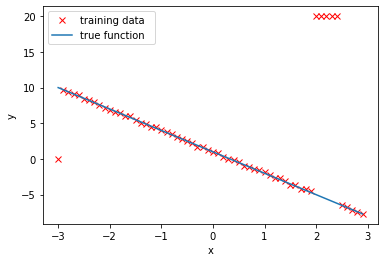

In [75]:
# Plot out training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

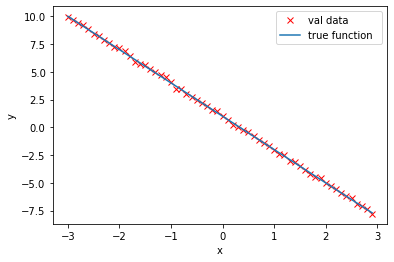

In [76]:
# Plot out training points

plt.plot(val_data.x.numpy(), val_data.y.numpy(), 'xr',label="val data ")
plt.plot(val_data.x.numpy(), val_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Create a Linear Regression Object, Data Loader, and criterion Function

In [77]:
from torch import nn

class linear_reg(nn.Module):

  # Contructor
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  # Prediction Function
  def forward(self, x):
    yhat = self.linear(x)
    return yhat

In [78]:
# create MSELoss function and a DataLoader object

criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

<h2 id="LR_Hyper">Different learning rates and Data Structures to Store results for different Hyperparameters</h2>



In [79]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

train_error = torch.zeros(len(learning_rates))
validation_error = torch.zeros(len(learning_rates))

MODELS = []

<h2 id="Model">Train different models  for different Hyperparameters</h2>

In [81]:
def train_model_with_lr(iter, lr_list):

  # iterate through different learning rates
  for i, lr in enumerate(lr_list):
    model = linear_reg(1, 1)
    optimizer = optim.SGD(model.parameters(), lr = lr)
    #Optimizers are algorithms or methods used to change the attributes 
    #of the neural network such as weights and learning rate to reduce the 
    #losses. Optimizers are used to solve optimization problems by minimizing the function.
    for epoch in range(iter):
      for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # train data
    Yhat = model(train_data.x)
    train_loss = criterion(Yhat, train_data.y)
    train_error[i] = train_loss.item()

    # validation data
    Yhat = model(val_data.x)
    validation_loss = criterion(yhat, val_data.y)
    validation_error[i] = validation_loss.item()

    MODELS.append(model)

train_model_with_lr(10, learning_rates)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([60, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


<h2 id="Result">View the Results</h2>



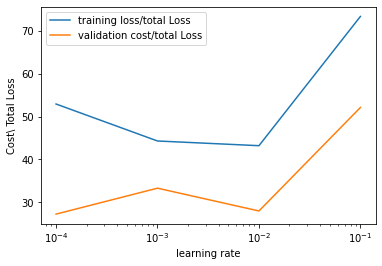

In [82]:
# Plot the training loss and validation loss

plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

i [[0.801316  ]
 [0.7994853 ]
 [0.79765457]]
i [[5.3829226]
 [5.266862 ]
 [5.1508007]]
i [[6.5642447]
 [6.431157 ]
 [6.2980685]]
i [[14.288728]
 [13.859829]
 [13.43093 ]]


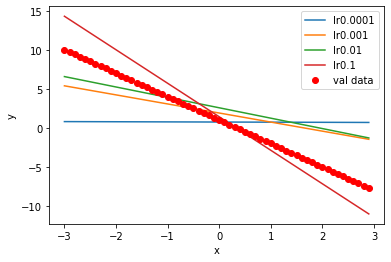

In [83]:
for model, learning_rate in zip(MODELS, learning_rates):
  yhat = model(val_data.x)
  plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr'+ str(learning_rate))
  print('i', yhat.detach().numpy()[0:3])
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'val data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()